In [48]:
import pandas as pd

In [49]:
import chardet

with open("news.csv", "rb") as f:
    result = chardet.detect(f.read())

print(result)


{'encoding': 'Windows-1254', 'confidence': 0.5630779560280365, 'language': 'Turkish'}


In [50]:
import pandas as pd

df = pd.read_csv("news.csv", encoding="latin-1")
print(df.head())

                                                text  class
0  'UluslararasÄ± Sakin Kentler BirliÄince TÃ¼rk...  Yasam
1  'Polonyada hasta bir tilki Ã§areyi alÄ±ÅveriÅ...  Dunya
2  'Ãinin Hong Kong Ãzel Ä°dari BÃ¶lgesinde hal...  Dunya
3  'Amerikan Merkezi Ä°stihbarat TeÅkilatÄ±ânÄ...  Dunya
4  'Ä°talyanÄ±n Lampedusa adasÄ± aÃ§Ä±klarÄ±nda a...  Dunya


In [51]:
!pip install ftfy

from ftfy import fix_text

df["text"] = df["text"].apply(fix_text)
print(df.head())

                                                text  class
0  'Uluslararası Sakin Kentler Birliğince Türkiye...  Yasam
1  'Polonyada hasta bir tilki çareyi alışveriş me...  Dunya
2  'Çinin Hong Kong Özel İdari Bölgesinde halk ha...  Dunya
3  'Amerikan Merkezi İstihbarat Teşkilatı'nın (CI...  Dunya
4  'İtalyanın Lampedusa adası açıklarında alabora...  Dunya


<Axes: xlabel='class'>

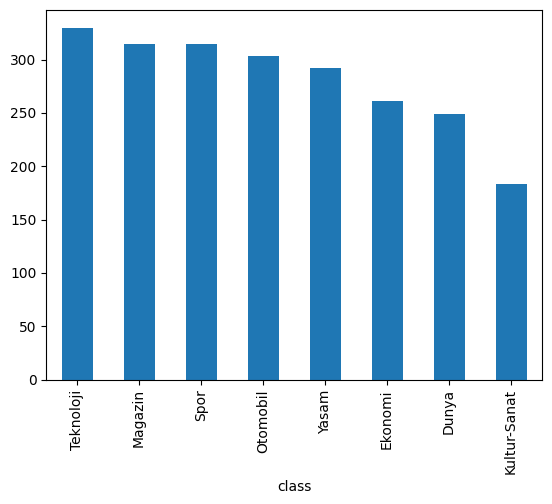

In [52]:
df['class'].value_counts().plot(kind='bar')

In [53]:
# PREPROCESSING
import string
import nltk
nltk.download('stopwords')

# Define Turkish stop words
stop_words = nltk.corpus.stopwords.words('turkish')

def clean_text(text):
    text = text.lower()
    text = ''.join(ch for ch in text if ch not in string.punctuation and not ch.isdigit())
    text = ' '.join(text.split())
    text = ' '.join(token for token in text.split() if token not in stop_words)
    return text

df["clean_text"] = df["text"].apply(clean_text)
print(df[["text", "clean_text"]].head())
print(df["clean_text"].iloc[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  'Uluslararası Sakin Kentler Birliğince Türkiye...   
1  'Polonyada hasta bir tilki çareyi alışveriş me...   
2  'Çinin Hong Kong Özel İdari Bölgesinde halk ha...   
3  'Amerikan Merkezi İstihbarat Teşkilatı'nın (CI...   
4  'İtalyanın Lampedusa adası açıklarında alabora...   

                                          clean_text  
0  uluslararası sakin kentler birliğince türkiyen...  
1  polonyada hasta bir tilki çareyi alışveriş mer...  
2  çinin hong kong özel i̇dari bölgesinde halk ha...  
3  amerikan merkezi i̇stihbarat teşkilatının cia ...  
4  i̇talyanın lampedusa adası açıklarında alabora...  
uluslararası sakin kentler birliğince türkiyenin inci sakin kenti seçilen erzurumun uzundere ilçesindeki tortum şelalesi mevsimde olduğu sonbahar ziyaretçilerin ilgisini çekiyor unesconun dünya mirası listesine aday gösterilen erzurumun uzundere ilçesindeki dünyanın yüksek üncü şelalesi olan tortum şelalesi sonbaharla birlikte bürü

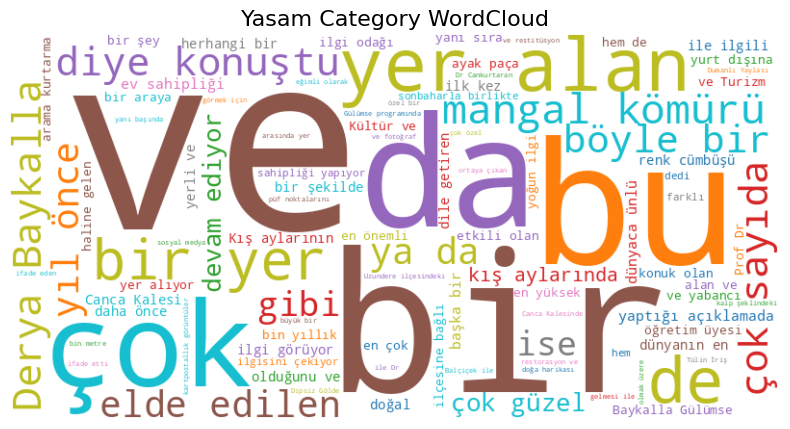

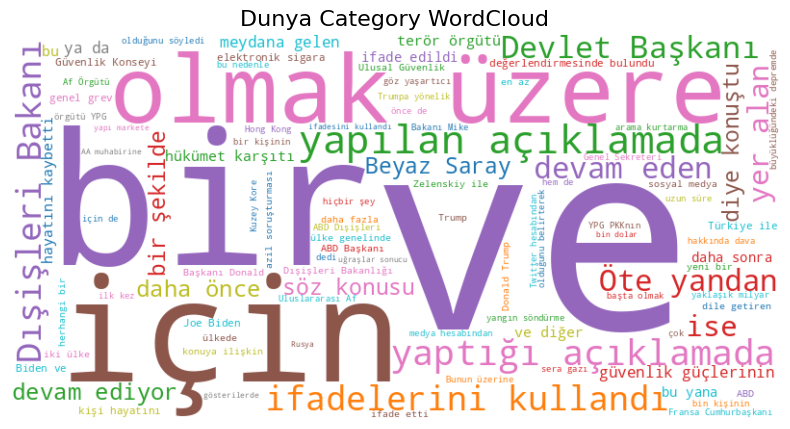

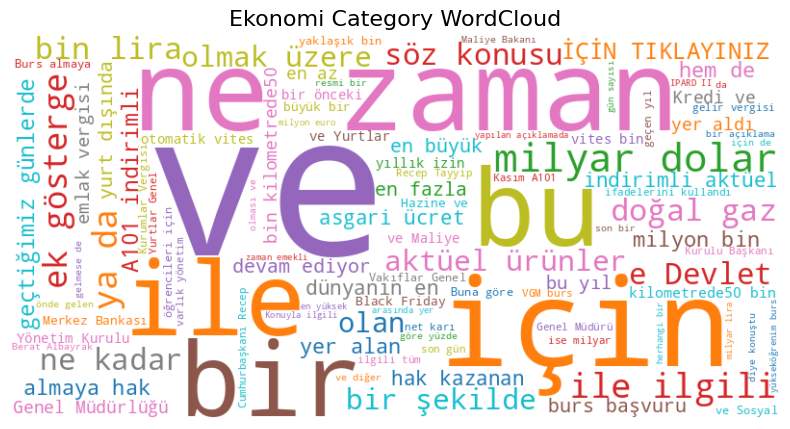

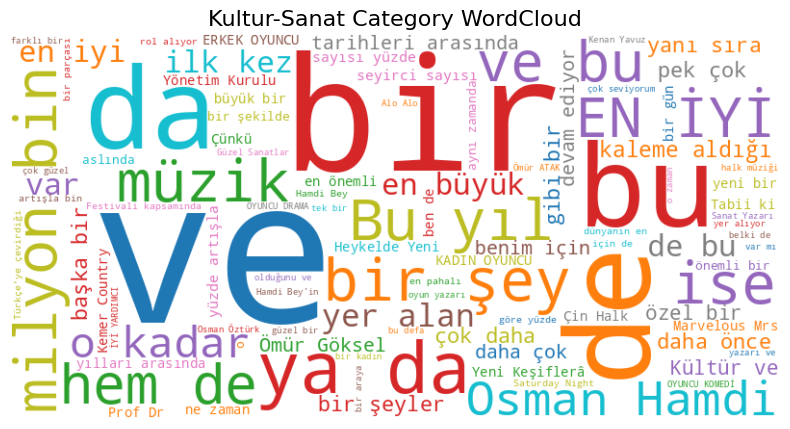

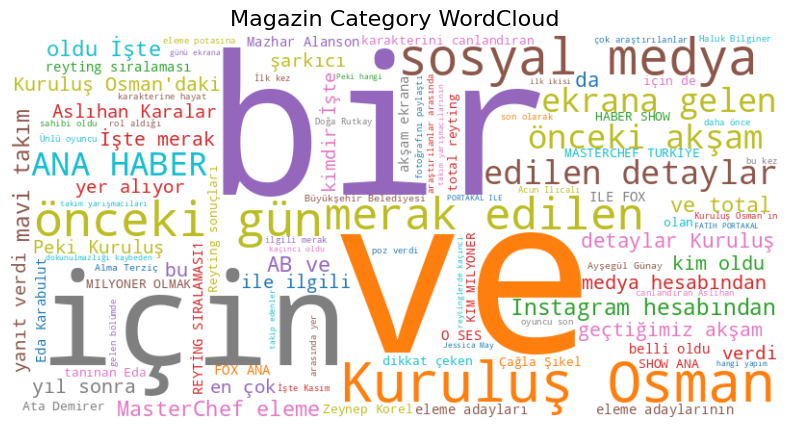

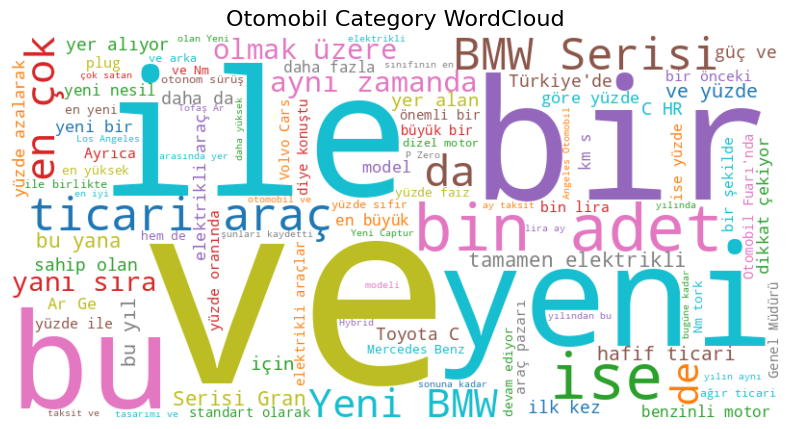

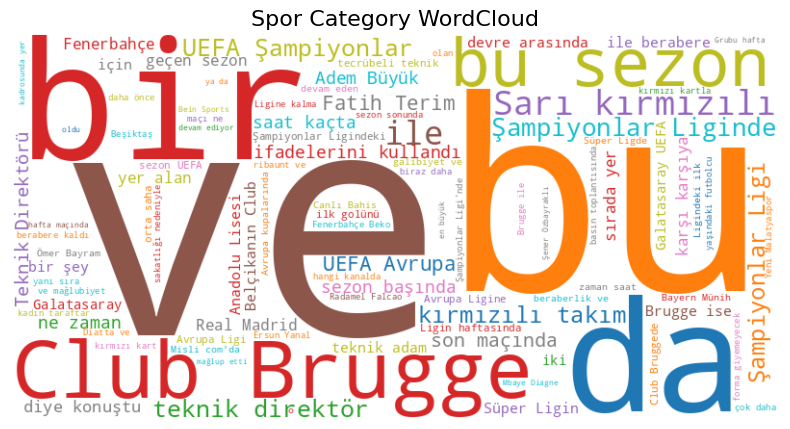

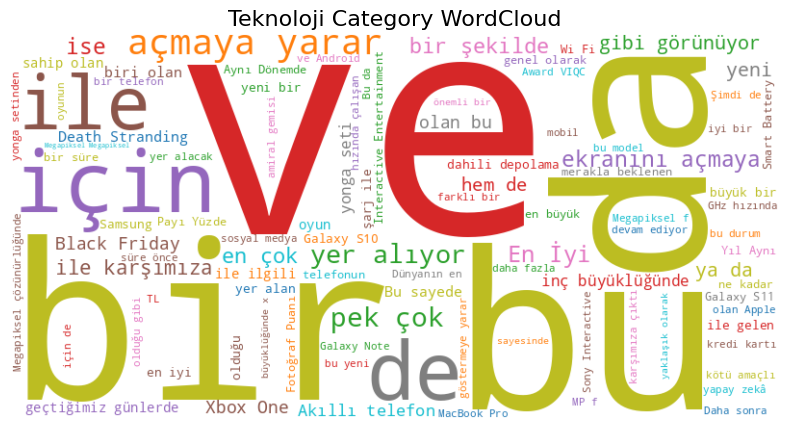

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

categories = df['class'].unique()

for cat in categories:
    cat_texts = " ".join(df[df['class'] == cat]['text'].tolist())

    # WordCloud oluştur
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        colormap='tab10'
    ).generate(cat_texts)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{cat} Category WordCloud", fontsize=16)
    plt.show()


In [55]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)  #fit_transform: eğitim verisini öğrenir ve dönüştürür
X_test_vec = vectorizer.transform(X_test)  # transform: test verisini aynı kurallarla dönüştürür

# Bu işlem bittiğinde X_train_vec ve X_test_vec artık sayısal matrislerdir ve modele verilebilir.

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train_vec, y_train)

pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


Accuracy: 0.9844444444444445
              precision    recall  f1-score   support

       Dunya       1.00      1.00      1.00        44
     Ekonomi       0.95      1.00      0.98        41
Kultur-Sanat       1.00      0.82      0.90        38
     Magazin       1.00      1.00      1.00        71
    Otomobil       0.97      1.00      0.99        67
        Spor       1.00      1.00      1.00        74
   Teknoloji       0.96      1.00      0.98        69
       Yasam       1.00      1.00      1.00        46

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.99      0.98      0.98       450



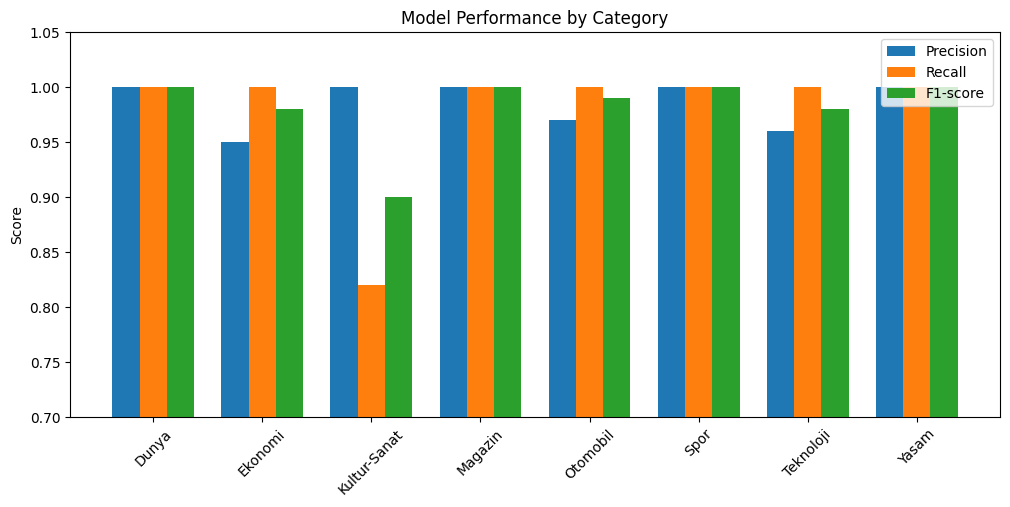

In [58]:
import matplotlib.pyplot as plt
import numpy as np

categories = ["Dunya","Ekonomi","Kultur-Sanat","Magazin","Otomobil","Spor","Teknoloji","Yasam"]

precision = [1.00, 0.95, 1.00, 1.00, 0.97, 1.00, 0.96, 1.00]
recall    = [1.00, 1.00, 0.82, 1.00, 1.00, 1.00, 1.00, 1.00]
f1        = [1.00, 0.98, 0.90, 1.00, 0.99, 1.00, 0.98, 1.00]

x = np.arange(len(categories))
width = 0.25

plt.figure(figsize=(12,5))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-score')

plt.xticks(x, categories, rotation=45)
plt.ylabel("Score")
plt.ylim(0.7,1.05)
plt.title("Model Performance by Category")
plt.legend()
plt.show()


In [59]:
train_pred = model.predict(X_train_vec)
train_acc = accuracy_score(y_train, train_pred)
print("Train Accuracy:", train_acc)


Train Accuracy: 0.9972191323692993


In [60]:
while True:
    text = input("Haber başlığı girin (çıkış için q): ")
    if text == "q":
        break
    clean = clean_text(text)
    vec = vectorizer.transform([clean])
    print("Tahmin:", model.predict(vec)[0])


Haber başlığı girin (çıkış için q): arda turan maç hakkında konuştu
Tahmin: Spor
Haber başlığı girin (çıkış için q): q


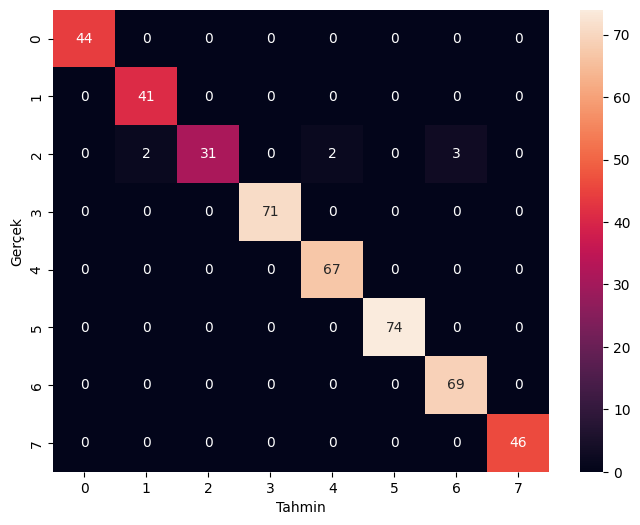

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel("Gerçek")
plt.xlabel("Tahmin")
plt.show()


In [62]:
import pickle

pickle.dump(model, open("news_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
